In [151]:
import pandas as pd
import numpy as np

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

In [153]:
train_data = pd.read_csv('train.csv')

In [154]:
train_data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
test_data = pd.read_csv('test.csv')

In [156]:
test_data.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_train = train_data.drop('label', axis = 1)

In [158]:
X_train.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
X_train = X_train/255

In [160]:
X_train_array = X_train.values

In [161]:
X_train_reshaped = X_train_array.reshape(-1,28,28,1)

In [162]:
y_train = train_data['label']

In [163]:
test_data.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
test_data = test_data/255

In [165]:
test_data_reshaped = test_data.values.reshape(-1,28,28,1)

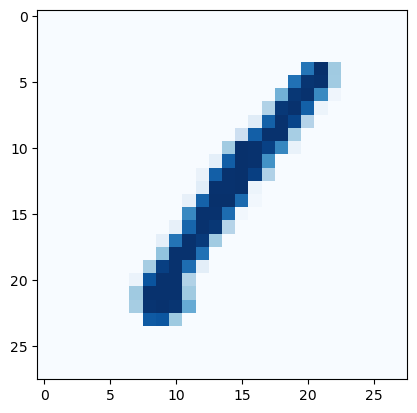

In [166]:
plt.imshow(train_data.iloc[0, 1:].values.reshape(28,28), cmap = 'Blues') #image in 1st row

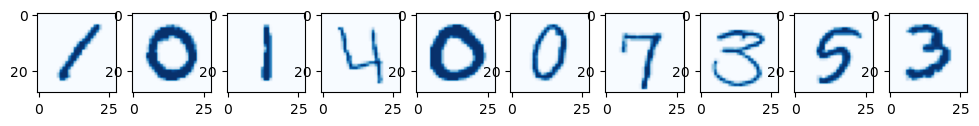

In [167]:
plt.figure(figsize = (12,12))
for i in range(0,10):  #images present in the first 10 rows
    plt.subplot(1,10,i+1)
    plt.imshow(train_data.iloc[i,1:].values.reshape(28,28), cmap = 'Blues')

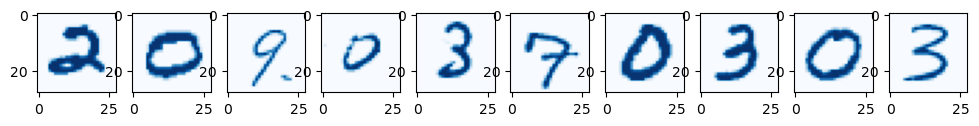

In [168]:
plt.figure(figsize = (12,12))
for i in range(0,10):  #images present in the first 10 rows in test data
    plt.subplot(1,10,i+1)
    plt.imshow(test_data.iloc[i,0:].values.reshape(28,28), cmap = 'Blues')

In [169]:
from tensorflow.keras import models, layers

In [170]:
import warnings
warnings.filterwarnings('ignore')

In [171]:
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [172]:
CNN.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN.fit(X_train_reshaped, y_train, epochs = 10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8465 - loss: 0.4854
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9757 - loss: 0.0801
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9823 - loss: 0.0547
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9865 - loss: 0.0416
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9916 - loss: 0.0288
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9909 - loss: 0.0261
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9946 - loss: 0.0164
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9961 - loss: 0.0142
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9960 - loss: 0.0127
Epoch 10/10
 744/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9959 - loss: 0.0130

In [ ]:
predictions = CNN.predict(test_data_reshaped)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[3])

In [ ]:
predicted_labels = predictions.argmax(axis=1)

In [ ]:
predicted_labels

In [ ]:
plt.figure(figsize = (12,12))
for i in range(0,10):  #images present in the first 10 rows in test data
    plt.subplot(1,10,i+1)
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.imshow(test_data.iloc[i,0:].values.reshape(28,28), cmap = 'Blues')